### Analysis of transects
First we are going to analyse transects from the individuals logs whihc are generated at the end of each batch run, so technocally for each environment we only have 30 individual logs and they all refer to a point in time in the iteration which correspond to iteration =  50000


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

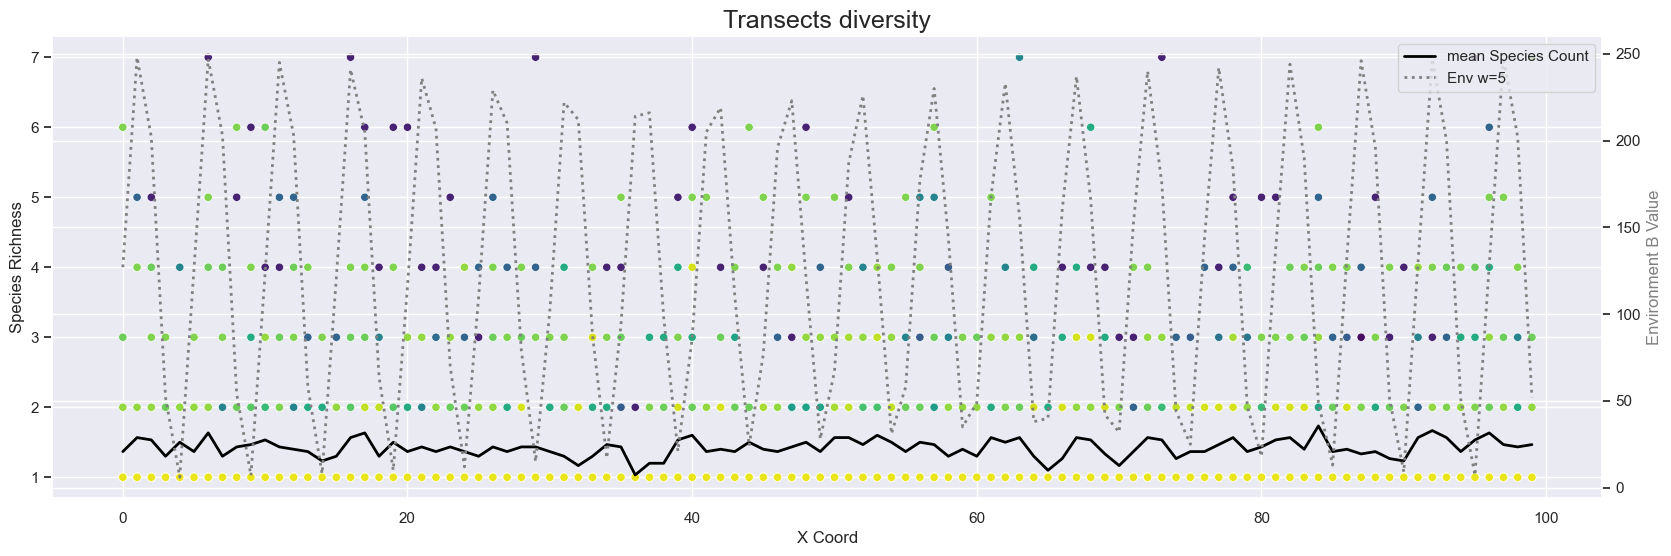

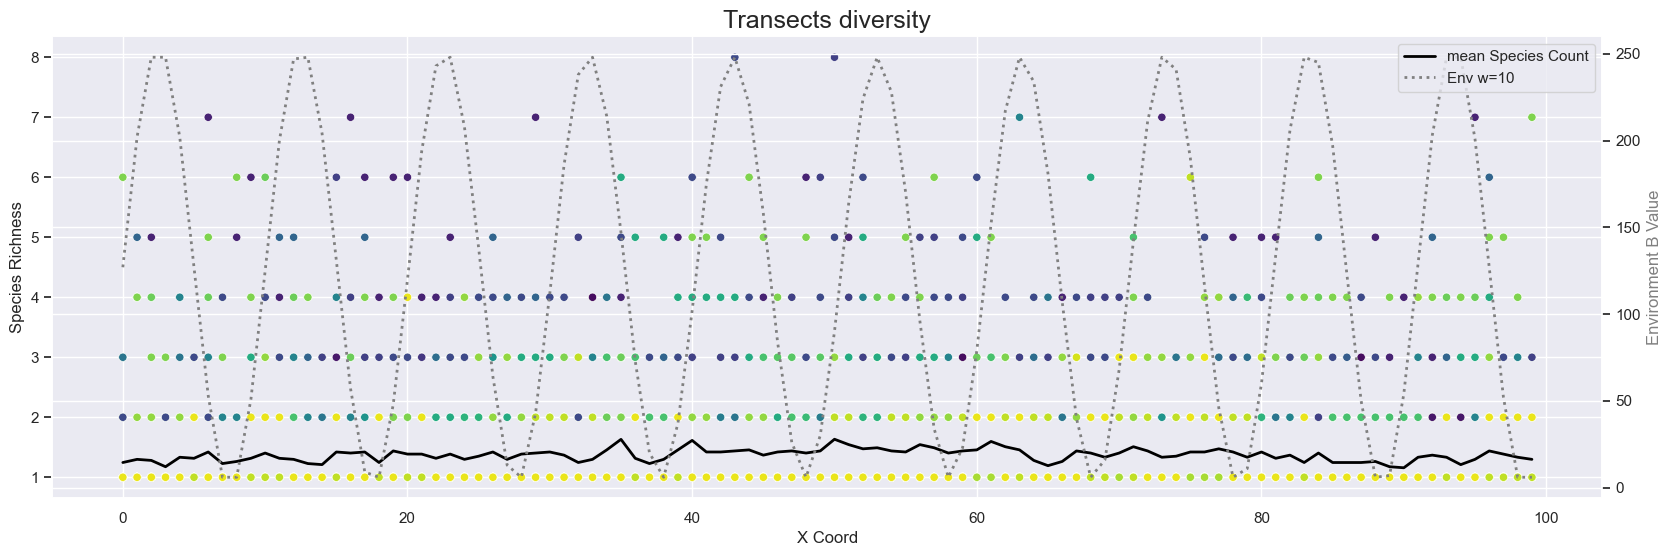

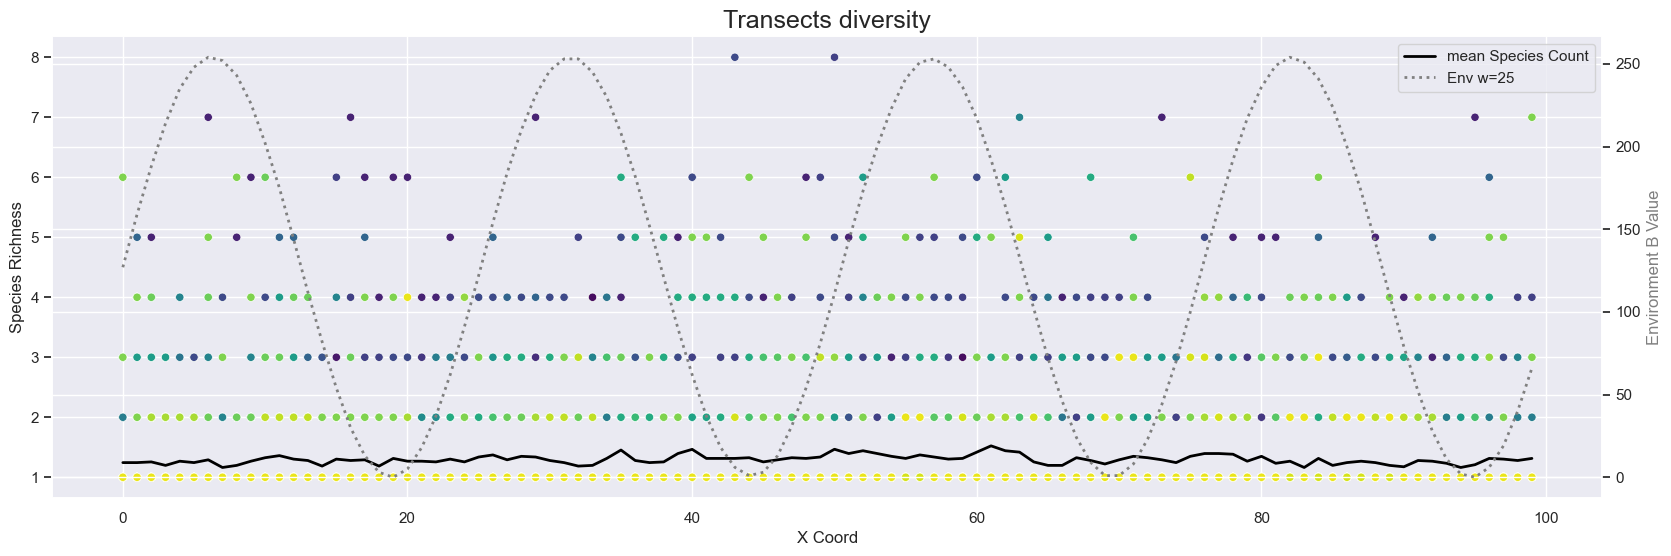

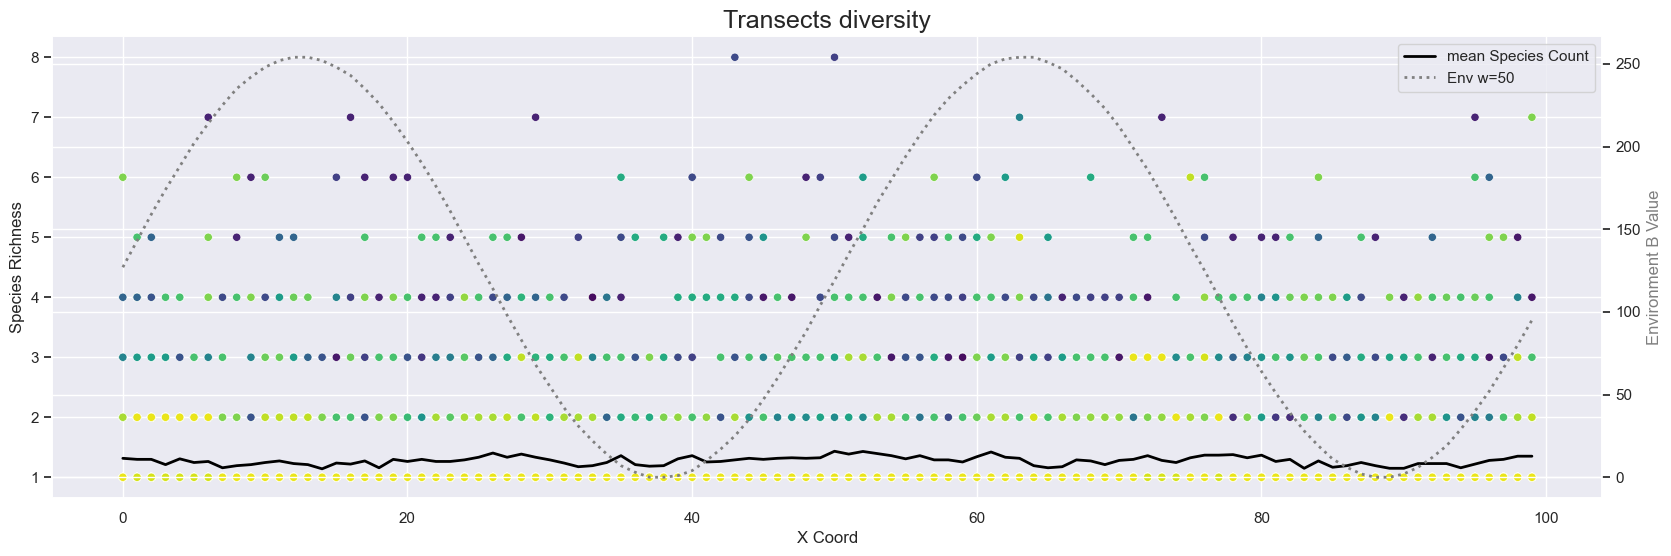

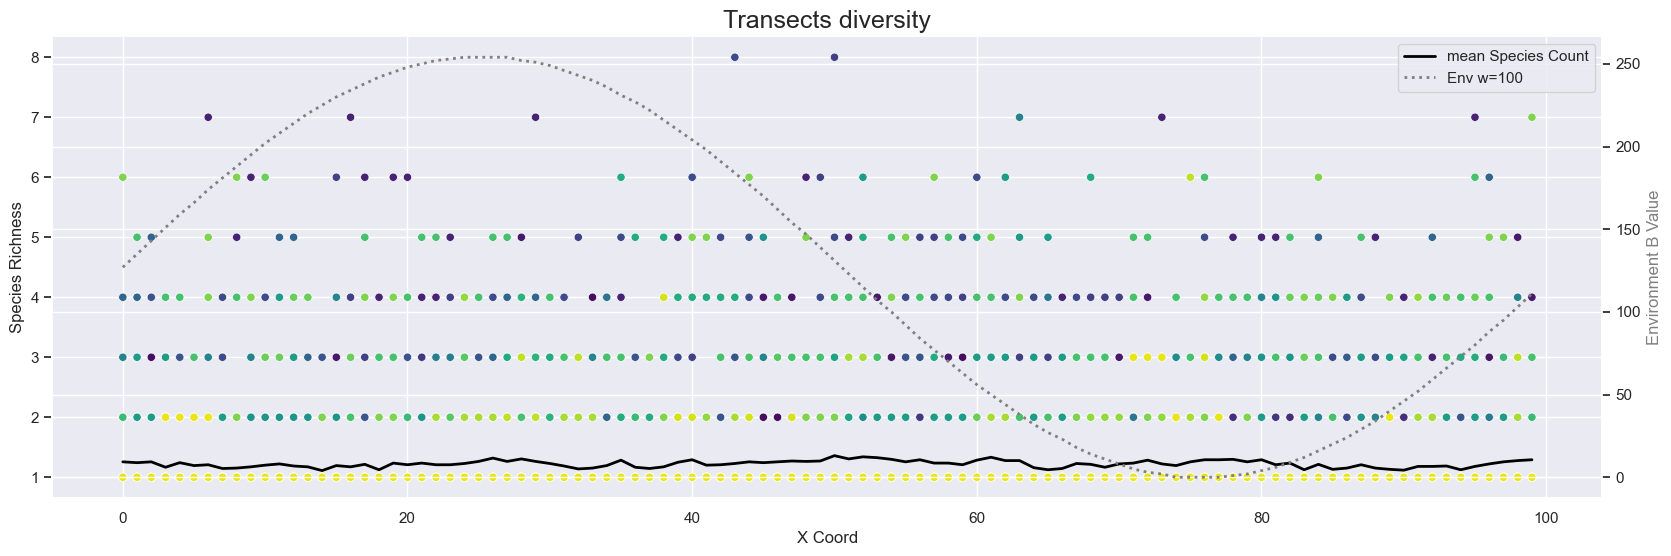

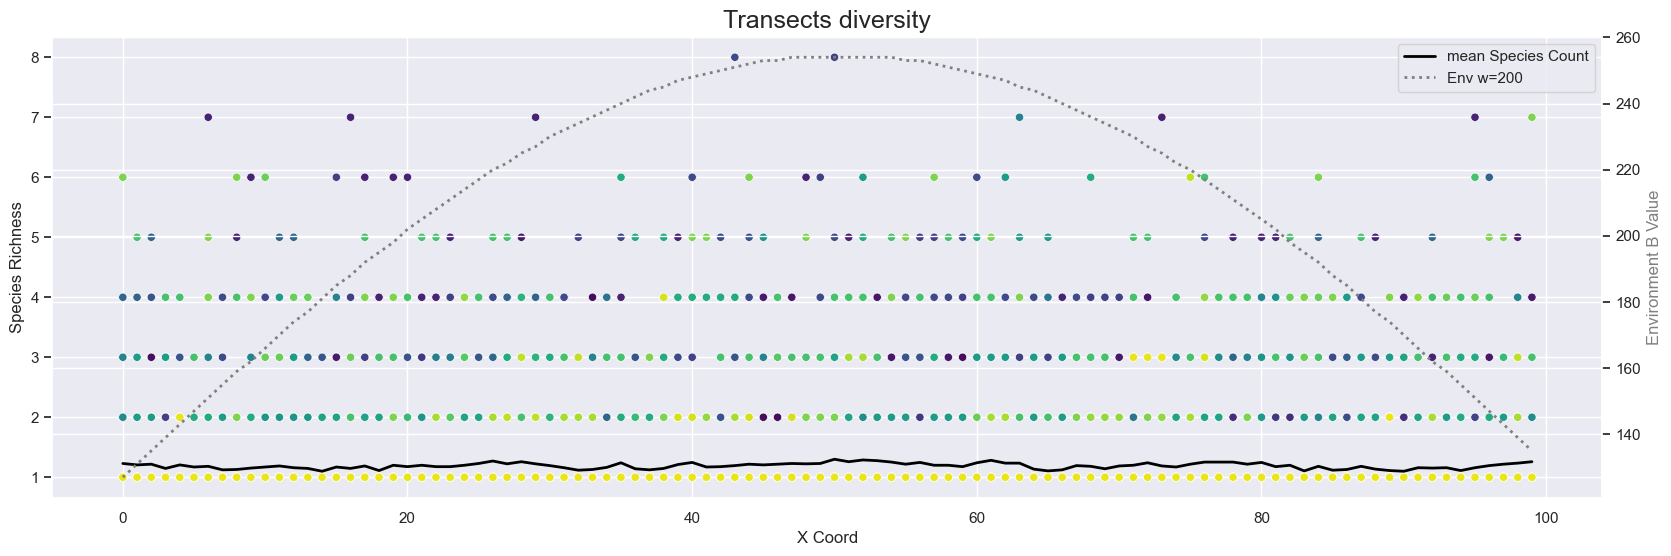

In [61]:
# define folder path
folder_paths = ['/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/2nd batches - Blue channel/1over5/mh',
                '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/2nd batches - Blue channel/1over10/mh',
                '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/2nd batches - Blue channel/1over25/mh',
                '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/2nd batches - Blue channel/1over50/mh',
                '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/2nd batches - Blue channel/1over100/mh',
                '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/2nd batches - Blue channel/1over200/mh',]

folder_labels = ['w=5', 'w=10', 'w=25', 'w=50', 'w=100', 'w=200']

# create an empty dataframe
transects = pd.DataFrame(columns=['X coord', 'Species Richness', 'Batch Num'])

for i, folder_path in enumerate(folder_paths):
    # creating a loop that will take all of the files, all of the individuals on atransect in the middle of the picture 
    for filename in os.listdir(folder_path):
        match = re.match(r'REvoSim_individuals_data_(\d+).txt', filename)
        if match:
            file_path = os.path.join(folder_path, filename)
            # import file 
            df = pd.read_csv(file_path, sep=',', header=0, skiprows=12)
            # take all the records that have y = 50 (a transect in the middle)
            df = df[df['Y coord'] == 50]
            df = df[['X coord', 'species ID', 'environment B value']]
            species_count = df.groupby('X coord')['species ID'].nunique().reset_index()
            species_count['Batch Num'] = f'sim {match.group(1)}'
            species_count =species_count.rename(columns={'species ID': 'Species Richness'} )
            
            colour_cell = df[['X coord', 'environment B value']]
            colour_cell = colour_cell.drop_duplicates(subset=['X coord', 'environment B value'], keep='first')
        

            transects= pd.concat([transects, species_count], ignore_index=True)

    # Calculate the average line
    average_line = transects.groupby('X coord')['Species Richness'].mean().reset_index()

    # Create a figure and axis
    fig, ax1 = plt.subplots(figsize=(20, 6))

    # Plot scatter plot and average line on the primary y-axis (left)
    scatter = sns.scatterplot(data=transects, x='X coord', y='Species Richness', hue='Batch Num', palette='viridis', ax=ax1)
    line1, = ax1.plot(average_line['X coord'], average_line['Species Richness'], label='Average Line', color='black', linewidth=2)

    # Create a secondary y-axis for the environent (right)
    ax2 = ax1.twinx()
    line2, = ax2.plot(colour_cell['X coord'], colour_cell['environment B value'], label='Environment', color='gray', linestyle='dotted', linewidth=2)

    # Set labels and title for the plot
    ax1.set_xlabel('X Coord')
    ax1.set_ylabel('Species Richness')
    ax2.set_ylabel('Environment B Value', color='gray')
    plt.title('Transects diversity', size=18)
    scatter.get_legend().remove()

    # Create my own legend
    handles = [line1, line2]
    labels = ['mean Species Count', f'Env {folder_labels[i]}']
    plt.legend(handles=handles, labels=labels, loc='upper right')
    plt.show()



